In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

## The game of Snakes and Ladders is a good candidate for analysis with a Markov Chain because of its memorylessness: at a given point in the game, the player's progression from the current square is independent of how they arrived at that square.

## In Markov Chain theory, the probability of a move from square i to square j is given by a transition matrix, T.
 
## Consider a very simple board where the player starts on square 0 and rolls a fair, six-sided die.  There are 9 squares on the board, labeled 1 through 9.  At this point, there are no snakes, and no ladders, on the board.
 
## The transition matrix for this board is a 10×10 matrix, where we label the rows i=0,1,2,⋯,9 as squares to move from and columns j=0,1,2,⋯9 as squares to move to. The first row the transition matrix therefore represents the probabilities of moving to each square from square 0; the second row represents the probabilities of moving to each square from square 1, and so on. 
 
## The moves are decided by the roll of a fair, six-sided die so the first few rows of the transition matrix in this case look like: 
 
## $$T = \begin{bmatrix}
0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 &   0 &   0 & 0  \\
0 & 0   & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 &   0 & 0  \\
0 & 0   & 0   & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0  \\
0 & 0   & 0   & 0   & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
0 & 0   & 0   & 0   & 0   & 1/6 & 1/6 & 1/6 & 1/6 & 2/6\\
0 & 0   & 0   & 0   & 0   & 0   & 1/6 & 1/6 & 1/6 & 3/6\\
0 & 0   & 0   & 0   & 0   & 0   & 0   & 1/6 & 1/6 & 4/6\\
0 & 0   & 0   & 0   & 0   & 0   & 0   & 0   & 1/6 & 5/6\\
0 & 0   & 0   & 0   & 0   & 0   & 0   & 0   &   0 & 6/6\\
0 & 0   & 0   & 0   & 0   & 0   & 0   & 0   &   0 & 0  \\
## \end{bmatrix}$$

## That is, (reading the first row) starting on square 0, there is a 1/6 probability of landing on each of the squares numbered 1–6. Reading the second row gives the probabilities for progression from square 1 (1/6 for each of the destination squares 2–7), and so on.

## Some people play Snakes and Ladders with the requirement that, to win, the player must land exactly on square 9, but those of us who don't feel the need to prolong the game any longer than absolutely necessary allow anyone with a roll that lands on or passes 100 to win. This will change the probabilities in the transition matrix for squares 4–9. For example, from square 6, a roll of 3,4, 5, or 6 is sufficient to win.

## The game can be analysed with a row vector, $\vec{\bf{v}}$ with 10 components, representing the probabilities that the player is on each of the squares. Initially, $\vec{\bf{v}}(0)$ is (1,0,0,⋯,0), i.e. the player is certainly on square 0 before the game has begun. Subsequently, $\vec{\bf{v}}$ evolves by the relation
 
## $$\vec{\bf{v}}^{(k+1)} = \vec{\bf{v}}^{(k)}\bf{T}$$

## That is, the probabilities for the next move, k+1, are given by the dot product of the current state vector, v(k) and the transition matrix, T.

[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667 0.         0.         0.        ]
 [0.         0.         0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667 0.16666667 0.         0.        ]
 [0.         0.         0.         0.16666667 0.16666667 0.16666667
  0.16666667 0.16666667 0.16666667 0.        ]
 [0.         0.         0.         0.         0.16666667 0.16666667
  0.16666667 0.16666667 0.16666667 0.16666667]
 [0.         0.         0.         0.         0.         0.16666667
  0.16666667 0.16666667 0.16666667 0.33333333]
 [0.         0.         0.         0.         0.         0.
  0.16666667 0.16666667 0.16666667 0.5       ]
 [0.         0.         0.         0.         0.         0.
  0.         0.16666667 0.16666667 0.66666667]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.16666667 0.83333333]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.       

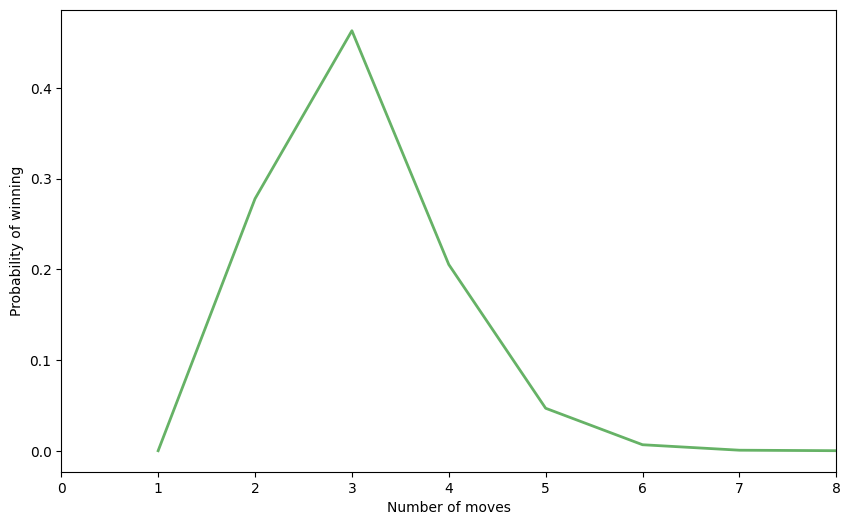

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the transition matrix
T = np.zeros((10, 10))
for i in range(0,4):
    T[i,i+1:i+7] = 1/6
    
for i in range(4,9):
    T[i,i+1:9] = 1/6
    T[i,9] = (i-2)/6

# House rules: you don't need to land on 100, just reach it.
#T[95:100,100] += np.linspace(1/6, 5/6, 5)
print(T)

#print(T[0:6,0:12])
#print(T[94:100,94:101])

# The player starts at position 0.
v = np.zeros(10)
v[0] = 1

n, P = 0, []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.999999:
    n += 1
    v = v.dot(T)
    P.append(v[9])
    cumulative_prob += P[-1]
    print(n, cumulative_prob)

mode = np.argmax(P)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots()
ax.plot(np.linspace(1,n,n), P, 'g', lw=2, alpha=0.6)
ax.set_xlim(0,n)
ax.set_xlabel('Number of moves')
ax.set_ylabel('Probability of winning')

plt.show()

## The snakes and ladders are added as a list of tuples indicating which squares are joined. Note that the square on which a snake or ladder originates doesn't really need to be included in the transition matrix (since the player can never occupy these positions), but here we keep them for simplicity.


1 0.0
2 0.3611111111111111
3 0.6712962962962963
4 0.8171296296296297
5 0.8998199588477367
6 0.9451517489711935
7 0.9699216963877458
8 0.983515875057156
9 0.9909648991197989
10 0.9950477602552542
11 0.9972856560335485
12 0.9985122490446376
13 0.9991845540530272
14 0.9995530488022932
15 0.9997550231339185
16 0.999865726587256
17 0.9999264038691115
18 0.9999596614819523
19 0.9999778901958919
20 0.9999878814725602
21 0.9999933577562885
22 0.999996359343019
23 0.999998004532229
24 0.9999989062711357
25 0.9999994005200956
modal number of moves: 29


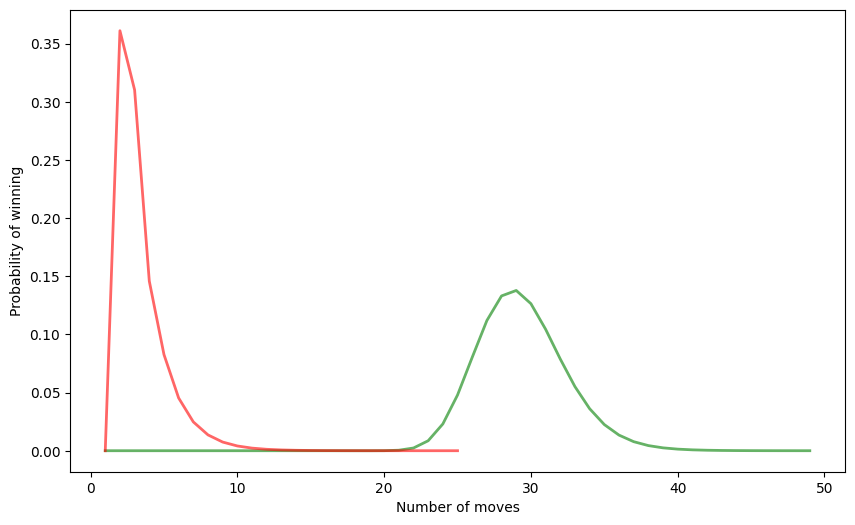

In [18]:
import numpy as np
import matplotlib.pyplot as plt

ladders = [(4,7)]
snakes = [(8,2)]
trans = ladders + snakes

# Set up the transition matrix
T = np.zeros((10, 10))
for i in range(0,4):
    T[i,i+1:i+7] = 1/6
    
for i in range(4,9):
    T[i,i+1:9] = 1/6
    T[i,9] = (i-2)/6

for (i1,i2) in trans:
    iw = np.where(T[:,i1] > 0)
    T[:,i1] = 0
    T[iw,i2] += 1/6

v = np.zeros(10)
v[0] = 1

n, P = 0, []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.999999:
    n += 1
    v = v.dot(T)
    P.append(v[9])
    cumulative_prob += P[-1]
    print(n, cumulative_prob)
    
mode = np.argmax(Ps)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots()
ax.plot(np.linspace(1,ns,ns), Ps, 'g-', lw=2, alpha=0.6, label='Markov')
ax.plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax.set_xlabel('Number of moves')
ax.set_ylabel('Probability of winning')

plt.show()